In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [70]:
data = pd.read_csv('C:\ML\Boston.csv')
data = data.drop('Unnamed: 0', axis=1)

In [71]:
X = data.drop('tax', axis=1)
y = data['tax']
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


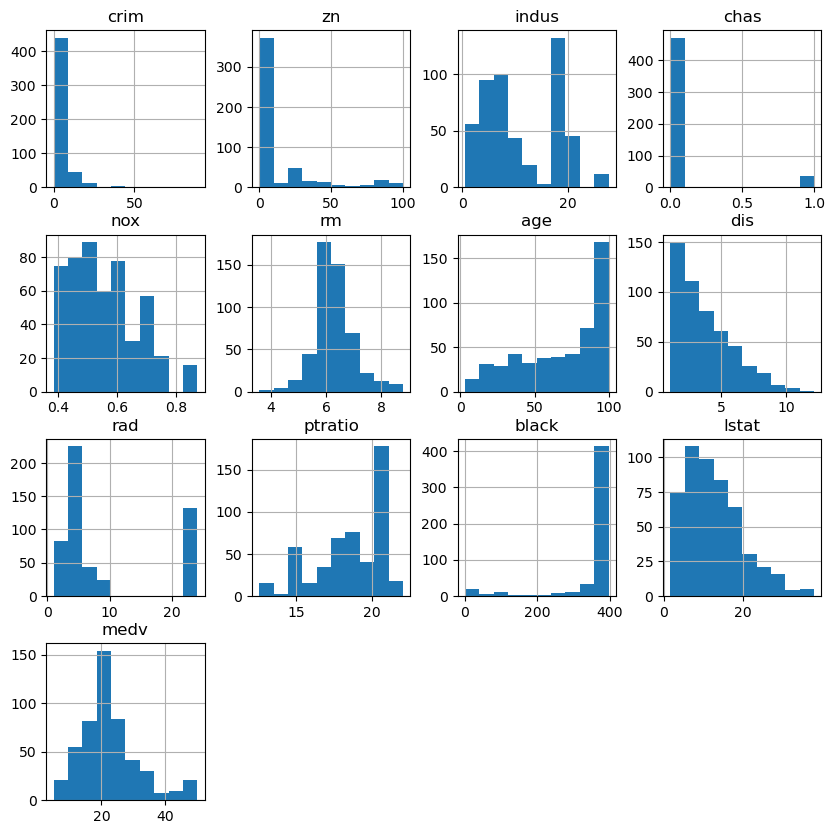

In [72]:
X.hist(X.columns, figsize=(10,10));

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train)
print(X_test)

         crim    zn  indus  chas    nox     rm   age     dis  rad  ptratio  \
5     0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3     18.7   
116   0.13158   0.0  10.01     0  0.547  6.176  72.5  2.7301    6     17.8   
45    0.17142   0.0   6.91     0  0.448  5.682  33.8  5.1004    3     17.9   
16    1.05393   0.0   8.14     0  0.538  5.935  29.3  4.4986    4     21.0   
468  15.57570   0.0  18.10     0  0.580  5.926  71.0  2.9084   24     20.2   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
106   0.17120   0.0   8.56     0  0.520  5.836  91.9  2.2110    5     20.9   
270   0.29916  20.0   6.96     0  0.464  5.856  42.1  4.4290    3     18.6   
348   0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4     17.0   
435  11.16040   0.0  18.10     0  0.740  6.629  94.6  2.1247   24     20.2   
102   0.22876   0.0   8.56     0  0.520  6.405  85.4  2.7147    5     20.9   

      black  lstat  medv  
5    394.12   5.21  28.7  
116  393.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.41814319, -0.45257245, -1.06299571, ...,  0.45712276,
        -0.5785895 ,  0.25394818],
       [-0.42197518,  1.15375592, -0.70943587, ...,  0.47107234,
        -1.34619278,  1.27339921],
       [-0.41662948, -0.45257245,  2.48608589, ...,  0.40341687,
         0.67938829, -0.9045189 ],
       ...,
       [-0.37095894, -0.45257245, -0.74089671, ...,  0.32260895,
        -1.19295074,  3.31230127],
       [ 0.17707231, -0.45257245,  1.04188384, ..., -2.48534188,
         0.42166305, -0.82342621],
       [ 0.64807771, -0.45257245,  1.04188384, ...,  0.38757414,
         0.45231146, -1.02036561]])

In [88]:
np.std(X_test, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [89]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [90]:
y_train_pred = reg_model.predict(X_train)
y_test_pred = reg_model.predict(X_test)

<BarContainer object of 13 artists>

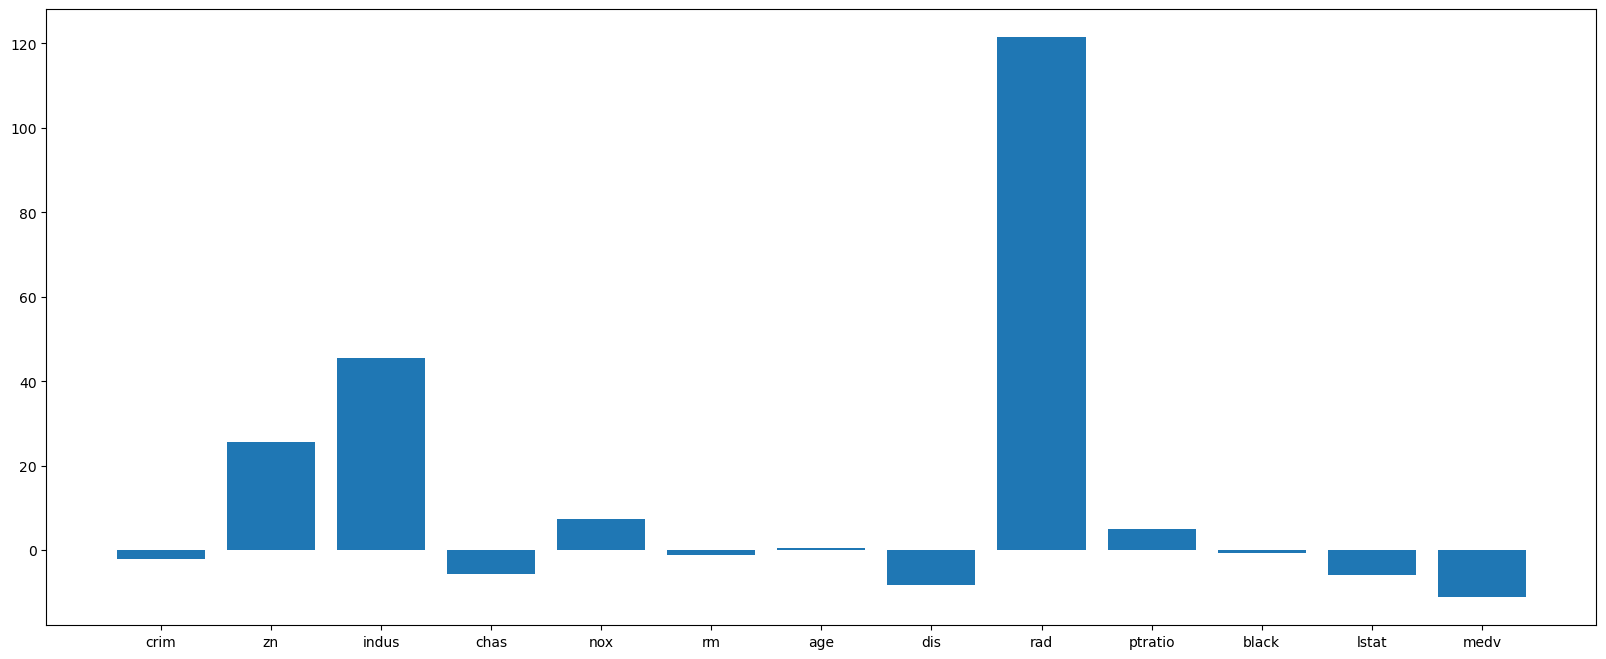

In [91]:
plt.figure(figsize=(20,8))
plt.bar(X.columns, reg_model.coef_)

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [107]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mae

32.57240890090623

152 152 152


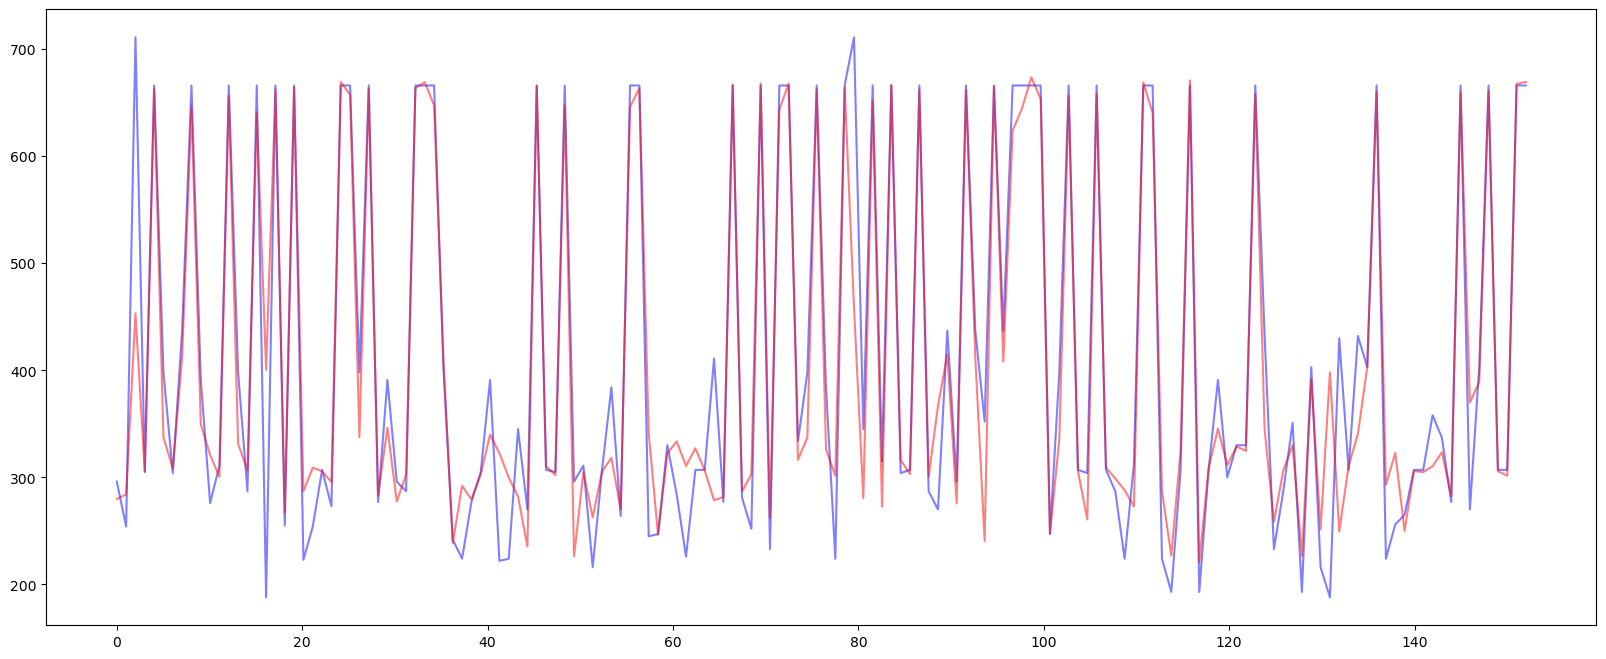

In [102]:
x = np.linspace(0,152,152)
print(len(x), len(y_test), len(y_test_pred))

plt.figure(figsize=(20,8))
plt.plot(x, y_test, label='y_test', color='blue', alpha=0.5)
plt.plot(x, y_test_pred, label='y_test_pred', color='red', alpha=0.5)

plt.show()

In [106]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=LinearRegression(), X=X, y=y, scoring='neg_mean_absolute_error', cv=5)
result

array([-34.60478698, -81.10134754, -48.73191431, -42.63038198,
       -38.77267595])